<a href="https://colab.research.google.com/github/SrZombra/modelo-no-supervisado/blob/main/Modelo_de_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/SrZombra/modelo-no-supervisado/refs/heads/main/dataset.csv"

data = pd.read_csv(url, sep=";")

df_puntos_parada = pd.DataFrame(data)


In [2]:
# Mostrar los primeros registros de la tabla simulada
df_puntos_parada.head()

,ID_Punto_Parada,Latitud,Longitud,Cantidad_Pasajeros,Hora_Pico,Promedio_Espera_Min,Tipo_Parada,Zona
0,1,40.712362,-73.712166,1698,11:00-13:00,13.0,SITP,Sur
1,2,40.885214,-73.789947,963,11:00-13:00,12.1,SITP,Centro
2,3,40.819598,-73.724200,842,17:00-19:00,24.5,SITP,Sur
3,4,40.779598,-73.742069,1364,11:00-13:00,7.2,SITP,Aeropuerto
4,5,40.646806,-73.860840,663,07:00-09:00,18.0,Transmilenio,Sur


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

In [4]:
df_puntos_parada

,ID_Punto_Parada,Latitud,Longitud,Cantidad_Pasajeros,Hora_Pico,Promedio_Espera_Min,Tipo_Parada,Zona
0,1,40.712362,-73.712166,1698,11:00-13:00,13.0,SITP,Sur
1,2,40.885214,-73.789947,963,11:00-13:00,12.1,SITP,Centro
2,3,40.819598,-73.724200,842,17:00-19:00,24.5,SITP,Sur
3,4,40.779598,-73.742069,1364,11:00-13:00,7.2,SITP,Aeropuerto
4,5,40.646806,-73.860840,663,07:00-09:00,18.0,Transmilenio,Sur
5,6,40.646798,-73.731250,1120,17:00-19:00,6.1,SITP,Centro
6,7,40.617425,-74.064603,195,07:00-09:00,3.6,Transmilenio,Este
7,8,40.859853,-74.021607,1857,07:00-09:00,13.0,Transmilenio,Norte
8,9,40.780335,-74.081909,584,11:00-13:00,14.5,SITP,Centro
9,10,40.812422,-73.969868,1530,17:00-19:00,3.2,SITP,Norte


In [5]:
encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df_puntos_parada[['Hora_Pico', 'Tipo_Parada', 'Zona']])

encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['Hora_Pico', 'Tipo_Parada', 'Zona']))

numerical_features = df_puntos_parada[['Latitud', 'Longitud', 'Cantidad_Pasajeros', 'Promedio_Espera_Min']]

scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

preprocessed_data = np.hstack([normalized_numerical_features, encoded_categories])

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(preprocessed_data)

df_puntos_parada['Cluster'] = clusters

df_puntos_parada

,ID_Punto_Parada,Latitud,Longitud,Cantidad_Pasajeros,Hora_Pico,Promedio_Espera_Min,Tipo_Parada,Zona,Cluster
0,1,40.712362,-73.712166,1698,11:00-13:00,13.0,SITP,Sur,3
1,2,40.885214,-73.789947,963,11:00-13:00,12.1,SITP,Centro,3
2,3,40.819598,-73.724200,842,17:00-19:00,24.5,SITP,Sur,2
3,4,40.779598,-73.742069,1364,11:00-13:00,7.2,SITP,Aeropuerto,3
4,5,40.646806,-73.860840,663,07:00-09:00,18.0,Transmilenio,Sur,1
5,6,40.646798,-73.731250,1120,17:00-19:00,6.1,SITP,Centro,3
6,7,40.617425,-74.064603,195,07:00-09:00,3.6,Transmilenio,Este,1
7,8,40.859853,-74.021607,1857,07:00-09:00,13.0,Transmilenio,Norte,0
8,9,40.780335,-74.081909,584,11:00-13:00,14.5,SITP,Centro,1
9,10,40.812422,-73.969868,1530,17:00-19:00,3.2,SITP,Norte,3


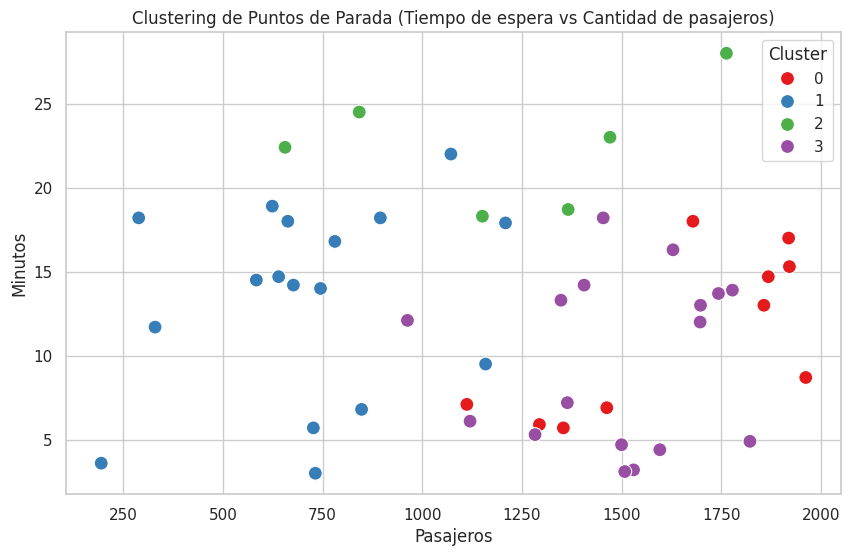

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
sns.set(style='whitegrid')

# Crear un gráfico de dispersión 2D de latitud y longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cantidad_Pasajeros', y='Promedio_Espera_Min', hue='Cluster', data=df_puntos_parada, palette='Set1', s=100)

# Títulos y etiquetas
plt.title('Clustering de Puntos de Parada (Tiempo de espera vs Cantidad de pasajeros)')
plt.xlabel('Pasajeros')
plt.ylabel('Minutos')

# Mostrar la leyenda
plt.legend(title='Cluster')
plt.show()

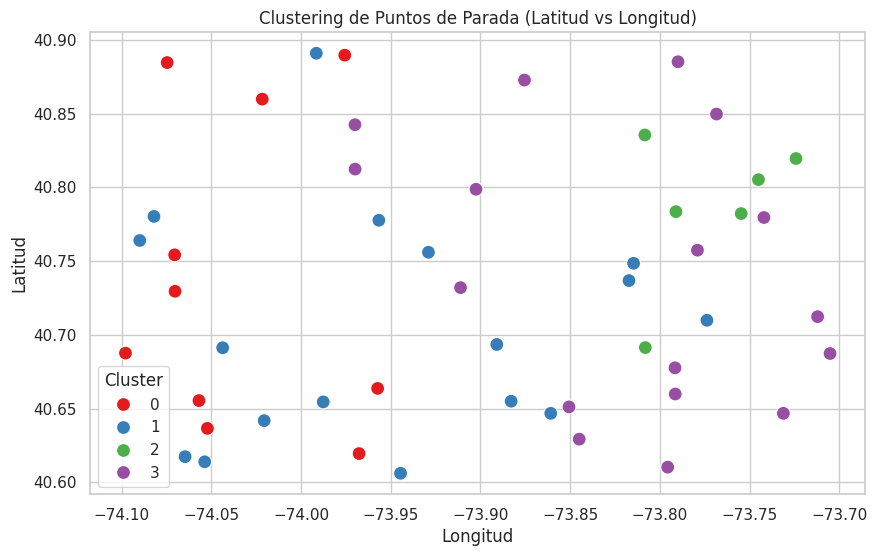

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
sns.set(style='whitegrid')

# Crear un gráfico de dispersión 2D de latitud y longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitud', y='Latitud', hue='Cluster', data=df_puntos_parada, palette='Set1', s=100)

# Títulos y etiquetas
plt.title('Clustering de Puntos de Parada (Latitud vs Longitud)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar la leyenda
plt.legend(title='Cluster')
plt.show()